## Employee Turnover Prediction

This Project features the implementation of an employee turnover analysis that is built using Python’s Scikit-Learn library. In this Project I will use Logistic Regression and Random Forest Machine Learning algorithms. At the end of this Project, you would be able to choose the best algorithm for your future projects like Employee Turnover Prediction.

### What is Employee Turnover?

Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

A Company uses this predictive analysis to measure how many employees they will need if the potential employees will leave their organization. A company also uses this predictive analysis to make the workplace better for employees by understanding the core reasons for the high turnover ratio.

### Data Preprocessing

load CSV file using Pandas from below link :

https://raw.githubusercontent.com/Codie8/10-Data-Science-ML-Project-for-beginners/main/Employee%20Turnover%20Prediction/HR_Data.csv

In [1]:
import pandas as pd

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/Codie8/10-Data-Science-ML-Project-for-beginners/main/Employee%20Turnover%20Prediction/HR_Data.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
print("Column Names : ",data.columns)

Column Names :  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


As we can see in data in Column sales is sales so we will rename that column to Department.

In [14]:
data = data.rename(columns={"sales":"department"})

In [19]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Our data is pretty clean, with no missing values, so let’s move further and see how many employees work in the organization

In [18]:
data.shape

(14999, 10)

The department column of the dataset has many categories, and we need to reduce the categories for better modelling. Let’s see all the categories of the department column

In [20]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let’s add all the “technical”, “support” and “IT” columns into one column (technical) to make our analysis easier

In [22]:
import numpy as np
data['department'] = np.where(data['department'] == 'support','technical',data['department'])
data['department'] = np.where(data['department'] == 'IT','technical',data['department'])
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

### Creating Variables for Categorical Variables

We need numerical colmuns in our data so we need to convert categorical columns to numecial, As there are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling

In [23]:
cat_var = ['department','salary']

for var in cat_var:
    
    cat_list = 'var_' +var
    cat_list = pd.get_dummies(data[var],prefix=var)
    data1 = data.join(cat_list)
    data = data1
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables

In [26]:
data.drop(data[['department','salary']],axis=1,inplace=True)
data.columns.unique()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

The dependent variable is “left”, and all the other variables are independent which will help us to predict "left"

In [28]:
data_vars = data.columns.values.tolist()
y = ['left']
X = [i for i in data_vars if i not in y]
print("X ",X)
print("Y ",y)

X  ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_technical', 'salary_high', 'salary_low', 'salary_medium']
Y  ['left']


### Feature Selection for Employee Turnover Prediction

Let’s use the feature selection method to decide which variables are the best option that can predict employee turnover with great accuracy. There are a total of 18 columns in X, and now let’s see how we can select about 10 from them

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model,10)
rfe = rfe.fit(data[X],data[y])
print(rfe.support_)
print(rfe.ranking_)

/home/nuagecx/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/nuagecx/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/nuagecx/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 8 1 1 1 1 7 1 1 6 4 5 9 1 1 2]


You can see that or feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns

['satisfaction_level', 'last_evaluation', 'time_spend_company', 
'Work_accident', 'promotion_last_5years', 'department_RandD', 
'department_hr', 'department_management', 'salary_high', 
'salary_low']

In [31]:
cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 
'Work_accident', 'promotion_last_5years', 'department_RandD', 
'department_hr', 'department_management', 'salary_high', 
'salary_low']

X = data[cols]
y = data['left']

### Logistic Regression Model to Predict Employee Turnover

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

Let’s check the accuracy of our logistic regression model.

In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,logreg.predict(X_test))
print("Logistic regression accuracy : {:.3f}".format(score))

Logistic regression accuracy : 0.771


### Random Forest Classification Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

Now let’s check the accuracy of our Random Forest Classification Model

In [50]:
rfscore = accuracy_score(y_test,rf.predict(X_test))
print("Random Forest Accuracy : {:.3f}".format(rfscore))

Random Forest Accuracy : 0.978


### Confusion Matrix for our Machine Learning Models

Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/nuagecx/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 1.0, 'Random Forest')

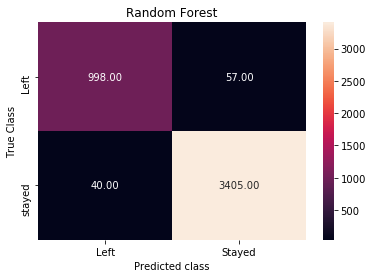

In [75]:
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(y_pred,y_test,[1,0])
sns.heatmap(forest_cm,annot=True,fmt='.2f',xticklabels=['Left','Stayed'],yticklabels= ['Left','stayed'])
plt.ylabel("True Class")
plt.xlabel("Predicted class")
plt.title("Random Forest")

### Logistic Regression

In [74]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



/home/nuagecx/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 1.0, 'Logistic Regression')

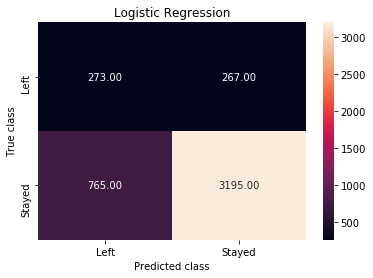

In [76]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### Employee Turnover Prediction Curve

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

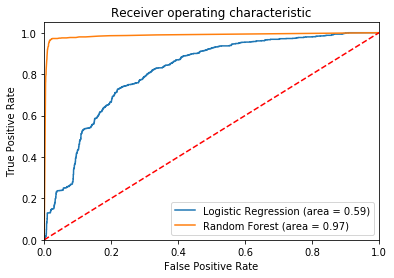

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [79]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.23%
department_management-0.26%
department_hr-0.29%
department_RandD-0.30%
salary_high-0.69%
salary_low-1.23%
Work_accident-1.43%
last_evaluation-18.19%
time_spend_company-26.79%
satisfaction_level-50.58%


According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.